# Simple Linear Regression

In this Notebook, we'll build a linear regression model to predict "Sales" using an approppriate predictor variable.

1. Reading and Understanding the data
2. Training the model
3. Residual analysis
4. Predicting and evaluating on test set

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:\\advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
#visualise the dataset

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Sales'>

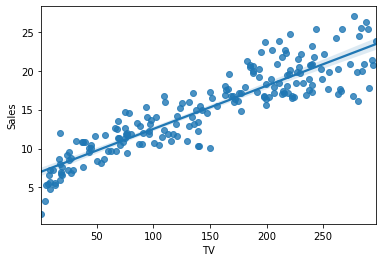

In [11]:
sns.regplot(x="TV", y ="Sales", data=df) #Regression line and scatter plot

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

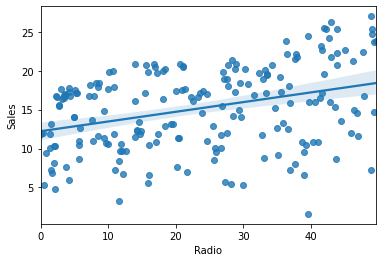

In [12]:
sns.regplot(x="Radio", y ="Sales", data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

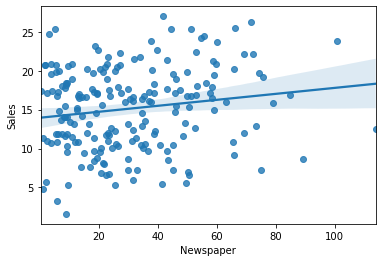

In [13]:
sns.regplot(x="Newspaper", y ="Sales", data=df)

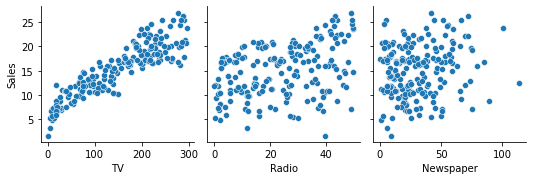

In [14]:
sns.pairplot(data=df, x_vars=["TV","Radio","Newspaper"], y_vars ="Sales") #to plot all plots together we use pair plot

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

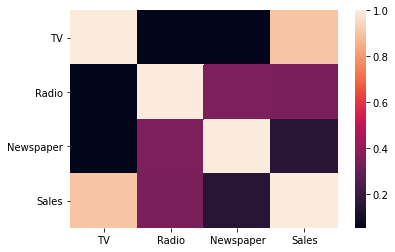

In [16]:
#another method to plot all these together is heatmap
sns.heatmap(df.corr())

<AxesSubplot:>

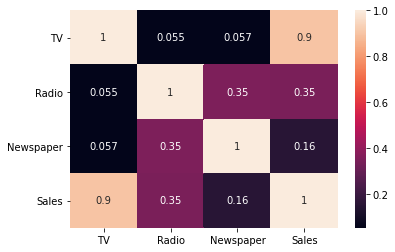

In [17]:
sns.heatmap(df.corr(),annot=True) #for corelation number

## Step2: Performing Simple Linear Regression
Equation of linear Regression

y=c+bx

y= response

c= intercept

b=slope

x=input


in our case 


y= c+ b * TV


the b values are called the model coefficients or model parameters

In [18]:
import statsmodels
import statsmodels.api as sm
import sklearn


In [19]:
# we can build our model from both liberaries statsmodel and sklearn

## Steps to build a model
- create x and y
- Create train and test sets ( 70-30 or 80-20)
- Train your model on training set (i.e learn the coefficient)
- Evaluate the model on test set (can also evaluate on tarning set)

In [20]:
#Create x and y
x = df["TV"]
y = df["Sales"]

In [21]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
x.shape

(200,)

In [23]:
y.shape

(200,)

In [24]:
x_train.shape #70% of total data

(140,)

In [25]:
x_test.shape # 30% of total data

(60,)

In [26]:
y_test.shape

(60,)

In [27]:
y_train.shape

(140,)

In [28]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [29]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

## train the model
##### lets start from stats model first

In [30]:
x_train_sm = sm.add_constant(x_train) #only when you use stats model 

In [31]:
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [32]:
# y = c+m1.x1
#y = c.const + m1.TV

In [33]:
#fitting the model
#OLS = Ordinary least square
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params # parameters

const    6.948683
TV       0.054546
dtype: float64

In [34]:
# sales = 6.94 + 0.05*TV

In [35]:
lr_model.summary() # this summary only given by stats model not by sklearn

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        22:41:21   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# p = 0 then coefiificent is significant 
# R-Squared is high that mean it's good

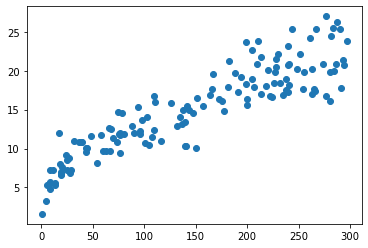

In [37]:
plt.scatter(x_train,y_train)

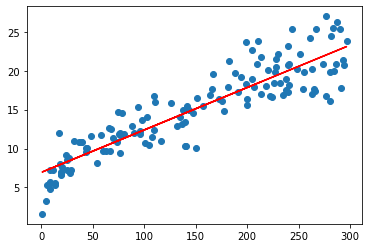

In [38]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9487+0.0545*x_train, "r")

## Step3: Reidual Analysis

The residuals are normally distributed, and there are no visible patterns in the error terms (except for the fact that the variance seems to be increasing a little for the higher values). So, this model fit looks good. Let's go ahead and make predictions on the test set.

In [39]:
# y_train, y_train_pred 
# difference b/w these two is called error
# error= y_train - y_train_pred 


In [40]:
y_train_pred=lr_model.predict(x_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

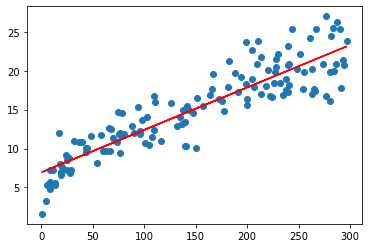

In [41]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_train_pred, "r") ### same as input[53]

# now start residuals error analysis

In [42]:
# y_train, y_train_pred 
# difference b/w these two is called error
# error= y_train - y_train_pred 


In [43]:
res = y_train-y_train_pred

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

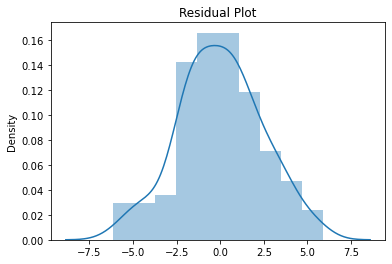

In [44]:
#plot the residulas
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

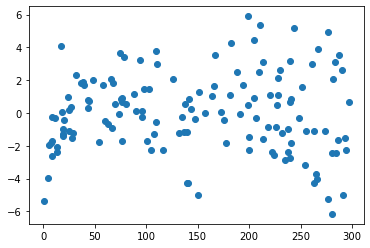

In [45]:
# look for patterns in residuals (we should not be able to identify)
plt.scatter(x_train,res)
plt.show()


#The residuals are normally distributed, and there are no visible patterns in the error terms (except for the fact that the variance seems to be increasing a little for the higher values). So, this model fit looks good. Let's go ahead and make predictions on the test set.

# STEP4: Prediction and Evaluation on the test set

In [46]:
# prediction on the test set(y_test_pred)
# evaluate the model, r-squared, on the test

In [47]:
#add a constatnt or intercept to test
x_test_sm= sm.add_constant(x_test)

# prediction on the test set(y_test_pred)


y_test_pred = lr_model.predict(x_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [48]:
# evaluate the model, r-squared, on the test

#r-squared 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
r2= r2_score(y_true = y_test, y_pred= y_test_pred)
r2

0.7921031601245658

In [50]:
#r2 on train
r2= r2_score(y_true = y_train, y_pred= y_train_pred)
r2

0.8157933136480389

In [51]:
#mean squared error
mean_squared_error(y_true = y_test, y_pred= y_test_pred)

4.077556371826956

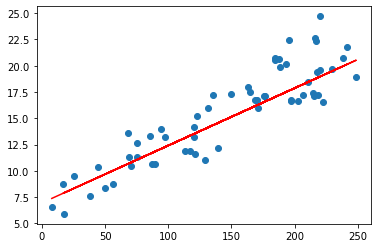

In [52]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, "r")
plt.show()

# Linear Regression Model BY SKLEARN

In [56]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [58]:
x_train.shape
#(160,)
#(160,1) #for multiple variable it is obvious but for single it wont work

(160,)

In [62]:
#reshape x_train to (n,1)
x_train_lm = x_train.values.reshape(-1,1)
x_test_lm = x_test.values.reshape(-1,1)

In [63]:
x_train_lm.shape

(160, 1)

In [64]:
# steps in sklearn modle building

# - Create an object of linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# - fit the model
lm.fit(x_train_lm, y_train)


LinearRegression()

In [67]:
# - see the parameters, make prdiction using modle (train, test)
print(lm.coef_) # coefficient of TV
print(lm.intercept_) 

[0.05410548]
6.995532914307688


In [68]:
# make predictions
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

In [69]:
#- evalute the model
print(r2_score(y_true = y_train, y_pred=y_train_pred))
print(r2_score(y_true = y_test, y_pred=y_test_pred))

0.8216142794949134
0.7281352744078883
